# Telecom Customer Churn 
##### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Encoding
from sklearn.preprocessing import OneHotEncoder

#ML
# ML & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data Understanding

In [2]:
churn_df = pd.read_csv('Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
churn_df.columns = [col.lower() for col in churn_df.columns]
churn_df.columns    

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [5]:
#check dtypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
# Describe Numerical columns
churn_df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Describe Categorical columns
churn_df.describe(include='object')

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
cat_cols = churn_df.select_dtypes(include='O').columns

for cat in cat_cols:
    print(f'{cat} has number of uniqus :',churn_df[cat].nunique())
    print(f'{cat} has uniques:',churn_df[cat].unique())
    print(f"\n{'='*100}\n")

customerid has number of uniqus : 7043
customerid has uniques: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender has number of uniqus : 2
gender has uniques: ['Female' 'Male']


partner has number of uniqus : 2
partner has uniques: ['Yes' 'No']


dependents has number of uniqus : 2
dependents has uniques: ['No' 'Yes']


phoneservice has number of uniqus : 2
phoneservice has uniques: ['No' 'Yes']


multiplelines has number of uniqus : 3
multiplelines has uniques: ['No phone service' 'No' 'Yes']


internetservice has number of uniqus : 3
internetservice has uniques: ['DSL' 'Fiber optic' 'No']


onlinesecurity has number of uniqus : 3
onlinesecurity has uniques: ['No' 'Yes' 'No internet service']


onlinebackup has number of uniqus : 3
onlinebackup has uniques: ['Yes' 'No' 'No internet service']


deviceprotection has number of uniqus : 3
deviceprotection has uniques: ['No' 'Yes' 'No internet service']


techsupport has number of uniqus : 3
tech

In [9]:
for cat in cat_cols:
    print(f'{cat} column count of each unique')
    print(churn_df[cat].value_counts())
    print(f"\n{'='*100}\n")

customerid column count of each unique
customerid
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender column count of each unique
gender
Male      3555
Female    3488
Name: count, dtype: int64


partner column count of each unique
partner
No     3641
Yes    3402
Name: count, dtype: int64


dependents column count of each unique
dependents
No     4933
Yes    2110
Name: count, dtype: int64


phoneservice column count of each unique
phoneservice
Yes    6361
No      682
Name: count, dtype: int64


multiplelines column count of each unique
multiplelines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


internetservice column count of each unique
internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


onlinesecurity column

## Data Cleaning

In [10]:
churn_df['totalcharges'] = pd.to_numeric(churn_df['totalcharges'],errors='coerce')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [11]:
#check duplicates
print(churn_df.duplicated().sum())

0


In [12]:
#check nulls
churn_df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [13]:
#drop nulls
churn_df.dropna(subset=['totalcharges'],inplace=True)
churn_df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
# drop unnecessary columns ( customerid )
churn_df.drop(columns=['customerid'],inplace=True)

In [15]:
churn_df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# check duplicates again
print(churn_df.duplicated().sum())

22


In [17]:
churn_df.drop_duplicates(inplace=True)
print(churn_df.duplicated().sum())

0


## EDA & Visualization

In [18]:
churn_df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [19]:
num_cols = churn_df.select_dtypes(include='number').columns[1:]
num_cols

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

### Visualization

#### Uni-variate

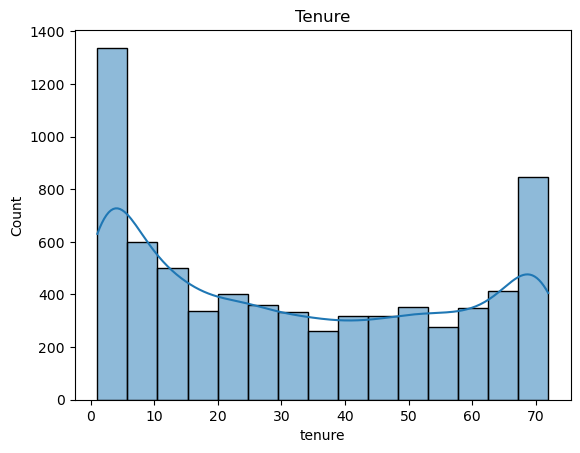

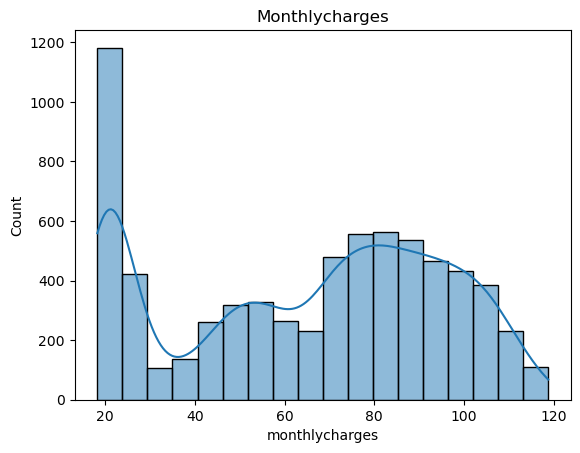

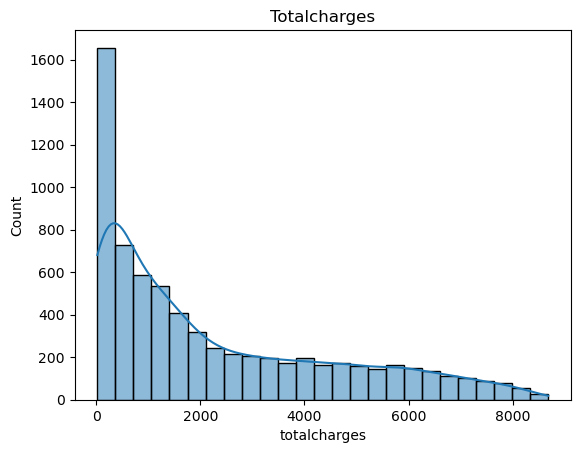

In [20]:
for col in num_cols:
    sns.histplot(churn_df[col],kde=True)
    plt.title(col.capitalize())
    plt.show()

<Axes: xlabel='seniorcitizen', ylabel='count'>

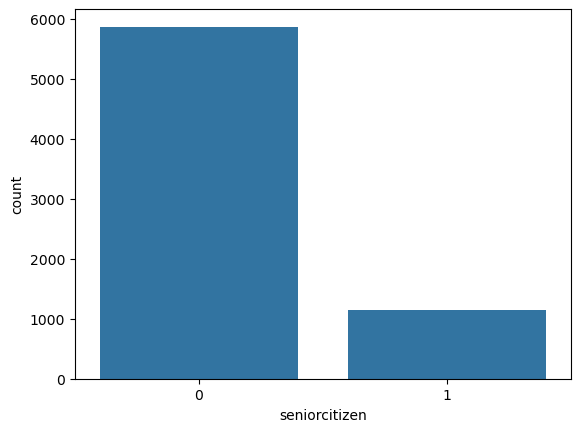

In [21]:
sns.countplot(x='seniorcitizen',data=churn_df)

In [22]:
cat_col = churn_df.select_dtypes(include='O').columns
len(cat_col)

16

In [23]:
for cat in cat_col:
    data = pd.DataFrame(churn_df[cat].value_counts())
    fig = px.pie(data,names=data.index,title=cat,values=data['count'].values,height=500,width=500,hole=0.3,color_discrete_sequence=px.colors.plotlyjs.Portland)
        # sns.countplot(x=cat,data=churn_df)
    fig.show()

#### Bi-Variate

<Axes: xlabel='contract', ylabel='count'>

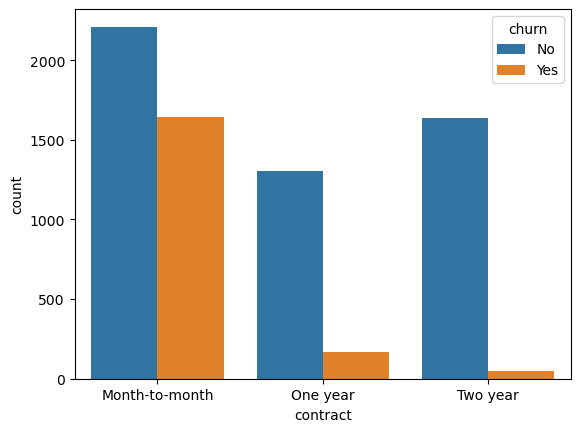

In [24]:
# contract vs Churn
sns.countplot(x='contract',hue='churn',data=churn_df)

<Axes: xlabel='paymentmethod', ylabel='count'>

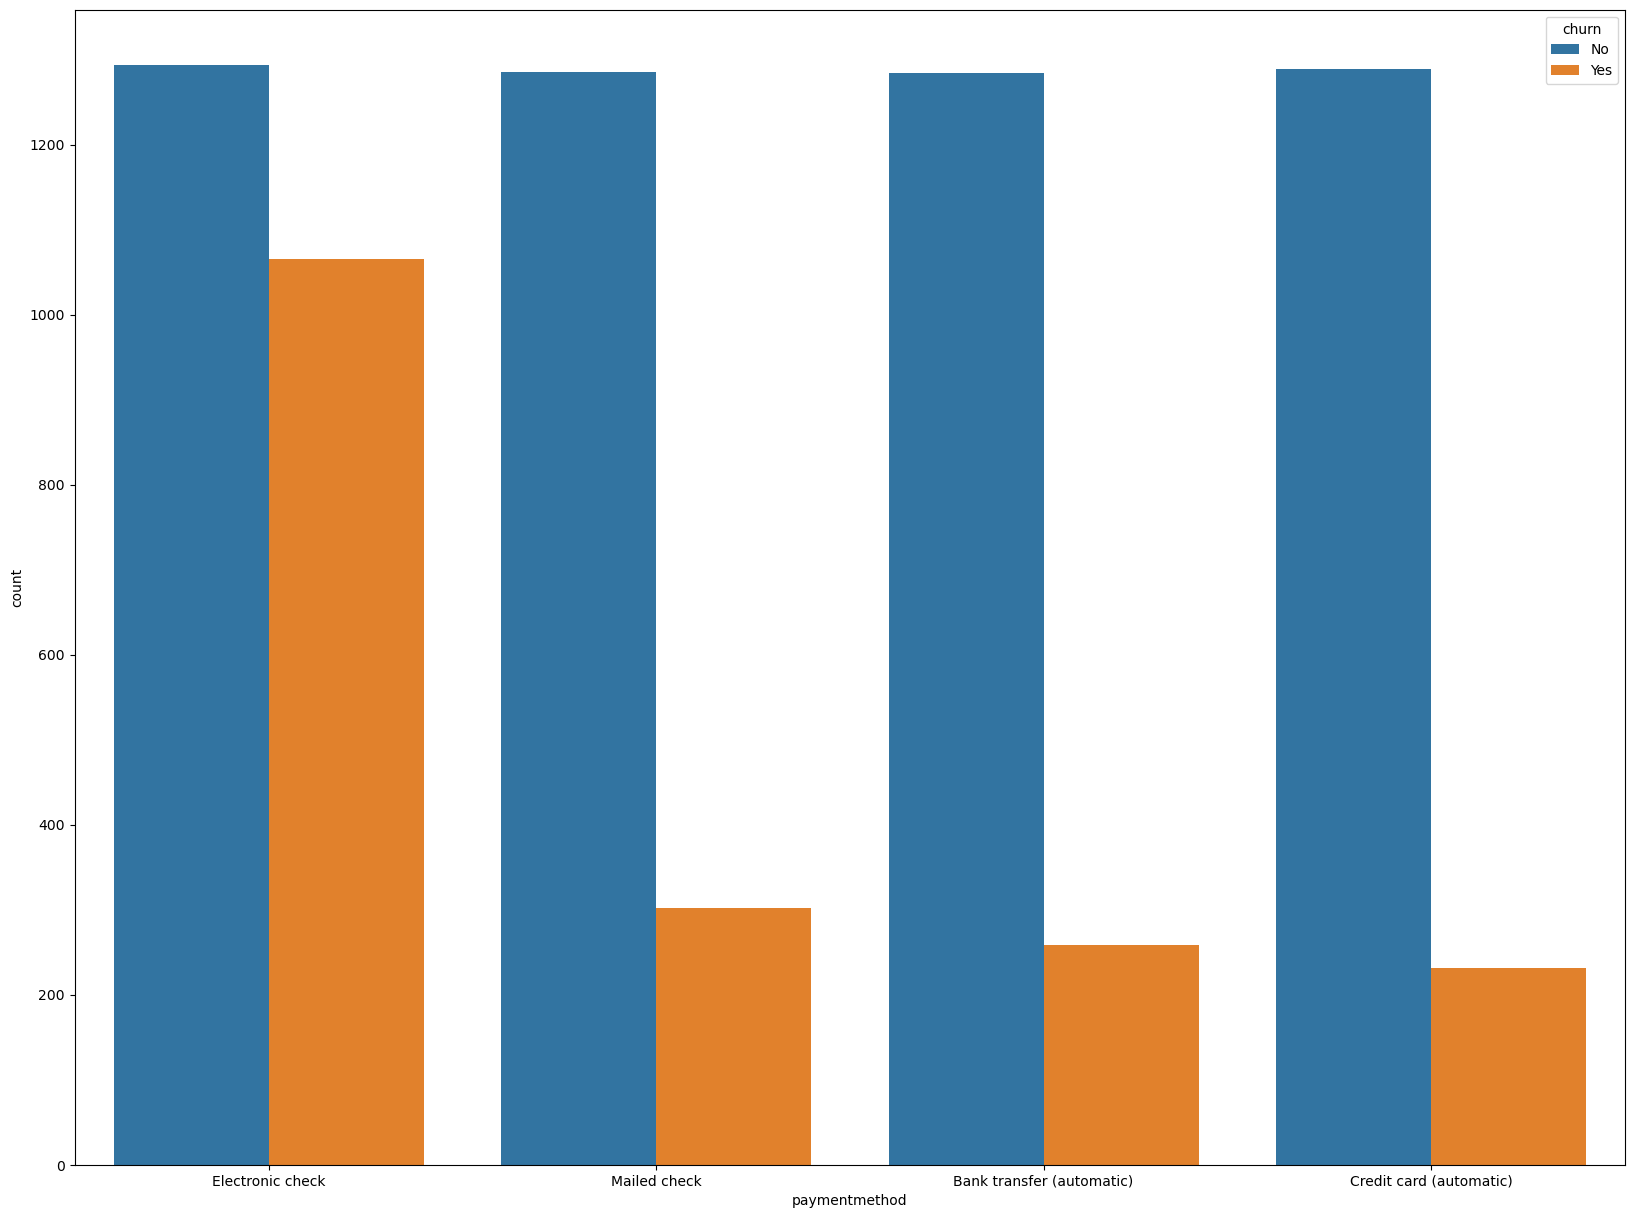

In [25]:
plt.figure(figsize=(20,15))
sns.countplot(data=churn_df,x='paymentmethod',hue='churn')

<Axes: xlabel='gender', ylabel='count'>

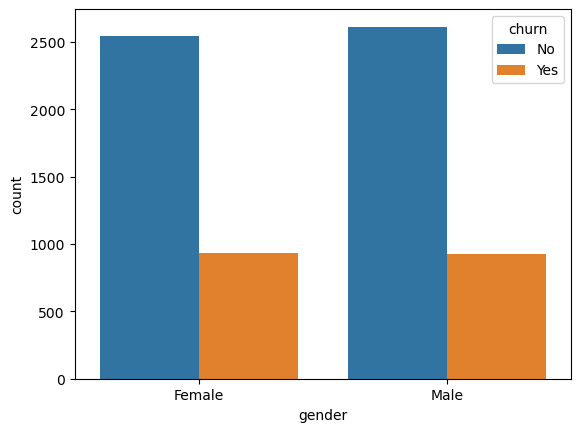

In [39]:
sns.countplot(x='gender',hue='churn',data=churn_df)

<Axes: xlabel='churn', ylabel='monthlycharges'>

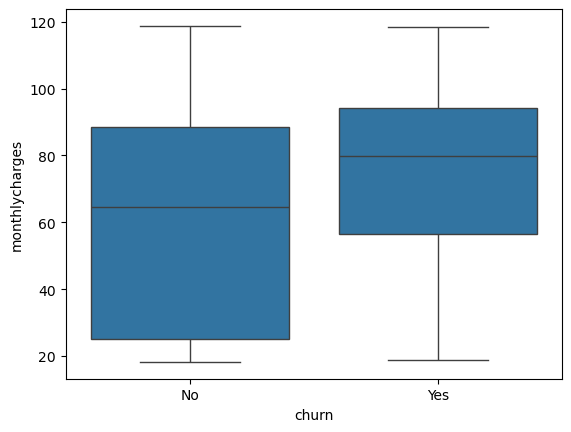

In [40]:
sns.boxplot(x='churn',y='monthlycharges',data=churn_df)

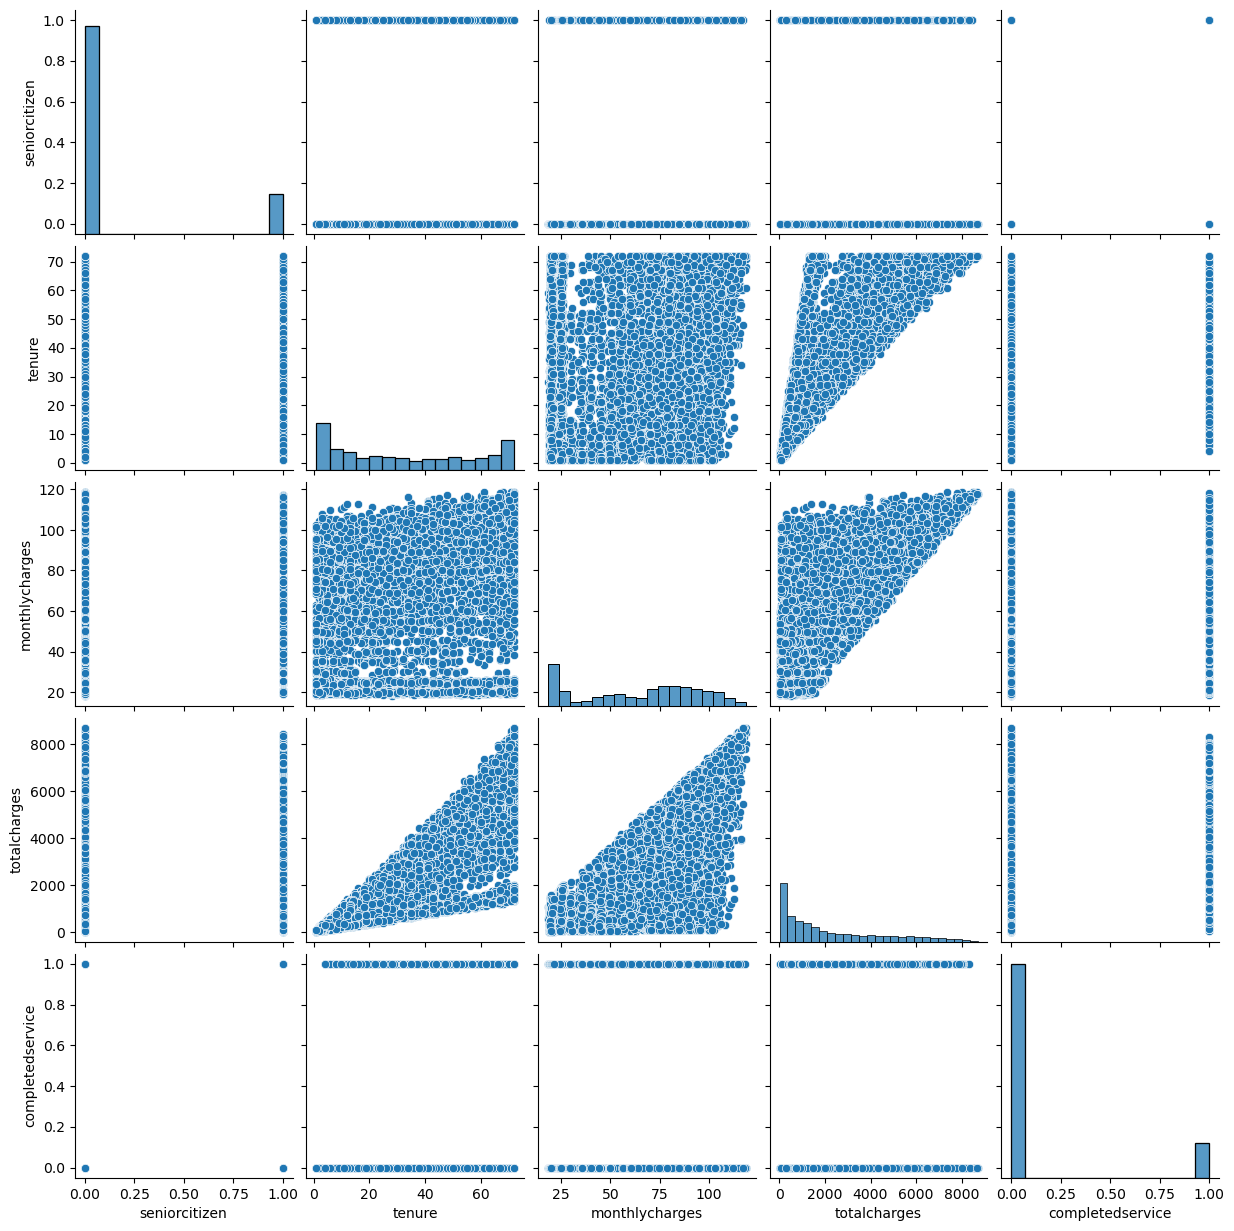

In [43]:
sns.pairplot(churn_df)

## Feature Extract

In [26]:
completed_status = (churn_df['tenure'] - (churn_df['totalcharges']/churn_df['monthlycharges']))
churn_df['completedservice'] = np.where((churn_df['tenure'] - (churn_df['totalcharges']/churn_df['monthlycharges'])) >= 1
                                        ,1,0)
churn_df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,completedservice
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


<Axes: xlabel='completedservice', ylabel='count'>

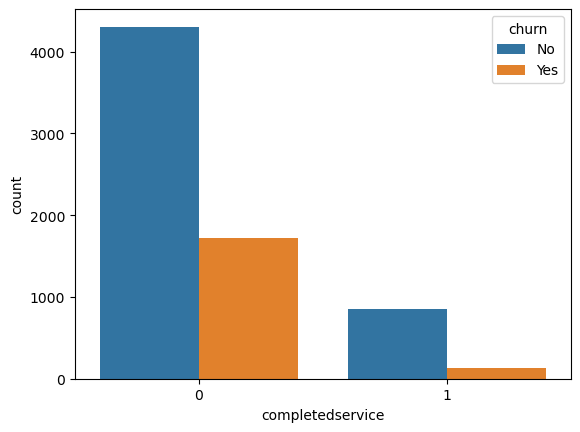

In [27]:
sns.countplot(data=churn_df,x='completedservice',hue='churn')

## Model Training

In [28]:
X = churn_df.drop('churn',axis=1)
y = churn_df['churn'].map({'Yes': 1 ,'No' : 0})
X.shape , y.shape

((7010, 20), (7010,))

In [29]:
categorical_cols = X.select_dtypes(include='O').columns
categorical_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [30]:
numerical_cols = X.select_dtypes(include='number').columns
numerical_cols

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'completedservice'],
      dtype='object')

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

preprocessing = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(drop='first'),categorical_cols),
        # ('target',OneHotEncoder(drop='first'),target_col)
    ]
)

In [32]:
from sklearn.pipeline import Pipeline

lr_pipeline = Pipeline(
    steps = [
    ('preprocessing',preprocessing),
    ('classifier',LogisticRegression())
    ]
)

rf_pipeline = Pipeline(
    steps = [
    ('preprocessing',preprocessing),
    ('classifier',RandomForestClassifier())
    ]
)

xgb_pipeline = Pipeline(
    steps = [
    ('preprocessing',preprocessing),
    ('classifier',XGBClassifier())
    ]
)



In [33]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr_pipeline.fit(X_train,y_train)
rf_pipeline.fit(X_train,y_train)
xgb_pipeline.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
lr_pred = lr_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)
xgb_pred = xgb_pipeline.predict(X_test)

print(f'\nLogistic Regression Model Accurecy :',accuracy_score(y_test,lr_pred))
print(f'\nRandom Forest Model Accurecy :',accuracy_score(y_test,rf_pred))
print(f'\nXGBoost Model Accurecy :',accuracy_score(y_test,xgb_pred))


Logistic Regression Model Accurecy : 0.8209700427960057

Random Forest Model Accurecy : 0.8059914407988588

XGBoost Model Accurecy : 0.8052781740370899


In [37]:
import joblib

joblib.dump(lr_pipeline,'chrun_prediction.pkl')

['chrun_prediction.pkl']

In [38]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.7.0
